In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pprint as pp
from sklearn.metrics import r2_score

sns.set_theme()
sns.set_context('talk')

In [2]:
maternal = pd.read_csv('data/maternal_disorder_mortality.csv')
maternal = maternal.drop(columns=["Mortality Rate, 1980*", "Mortality Rate, 1980* (Min)", "Mortality Rate, 1980* (Max)", 
                                              "Mortality Rate, 1985*", "Mortality Rate, 1985* (Min)", "Mortality Rate, 1985* (Max)", 
                                              "Mortality Rate, 1990*", "Mortality Rate, 1990* (Min)", "Mortality Rate, 1990* (Max)",
                                              "Mortality Rate, 1995*", "Mortality Rate, 1995* (Min)", "Mortality Rate, 1995* (Max)",
                                              "Mortality Rate, 2000*", "Mortality Rate, 2000* (Min)", "Mortality Rate, 2000* (Max)",
                                              "Mortality Rate, 2005*", "Mortality Rate, 2005* (Min)", "Mortality Rate, 2005* (Max)",
                                              "Mortality Rate, 2010*", "Mortality Rate, 2010* (Min)", "Mortality Rate, 2010* (Max)",
                                              "Mortality Rate, 2014*", "Mortality Rate, 2014* (Min)", "Mortality Rate, 2014* (Max)",
                                              "% Change in Mortality Rate, 1980-2014 (Min)", "% Change in Mortality Rate, 1980-2014 (Max)",
                                              "Unnamed: 0"])
neonatal = pd.read_csv('data/neonatal_disorder_mortality.csv')
neonatal = neonatal.drop(columns=["Mortality Rate, 1980*", "Mortality Rate, 1980* (Min)", "Mortality Rate, 1980* (Max)", 
                                              "Mortality Rate, 1985*", "Mortality Rate, 1985* (Min)", "Mortality Rate, 1985* (Max)", 
                                              "Mortality Rate, 1990*", "Mortality Rate, 1990* (Min)", "Mortality Rate, 1990* (Max)",
                                              "Mortality Rate, 1995*", "Mortality Rate, 1995* (Min)", "Mortality Rate, 1995* (Max)",
                                              "Mortality Rate, 2000*", "Mortality Rate, 2000* (Min)", "Mortality Rate, 2000* (Max)",
                                              "Mortality Rate, 2005*", "Mortality Rate, 2005* (Min)", "Mortality Rate, 2005* (Max)",
                                              "Mortality Rate, 2010*", "Mortality Rate, 2010* (Min)", "Mortality Rate, 2010* (Max)",
                                              "Mortality Rate, 2014*", "Mortality Rate, 2014* (Min)", "Mortality Rate, 2014* (Max)",
                                              "% Change in Mortality Rate, 1980-2014 (Min)", "% Change in Mortality Rate, 1980-2014 (Max)",
                                              "Unnamed: 0"])
contraceptive_demand = pd.read_csv('data/potential_contraceptive_demand.csv')
contraceptive_demand = contraceptive_demand.drop(columns=["county", "Unnamed: 0"])
merged = pd.merge(maternal, neonatal, on="GEOID20")
merged = merged.drop(columns=['Location_y'])
merged = merged.rename(columns={"Location_x":"County",
                               "% Change in Mortality Rate, 1980-2014_x":"Maternal % Change", "improved_x":"Maternal Improved",
                               "% Change in Mortality Rate, 1980-2014_y":"Neonatal % Change", "improved_y":"Neonatal Improved"})
county_data = pd.merge(merged, contraceptive_demand, on="GEOID20")

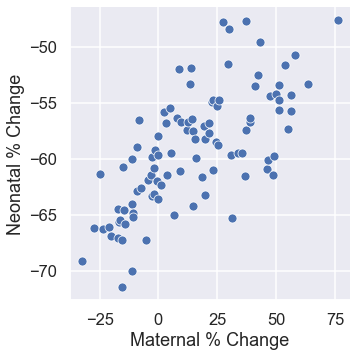

In [3]:
neonatal_vs_maternal = sns.relplot(data=county_data, x="Maternal % Change", y="Neonatal % Change")

In [4]:
county_data["Contraceptive Demand"] = 0
avg = county_data["Percentage of Women with Potential Demand"].mean()
std = county_data["Percentage of Women with Potential Demand"].std()
bottom_third = avg - (1*std)
top_third = avg + (1*std)
county_data.loc[(county_data["Percentage of Women with Potential Demand"] < bottom_third), 'Contraceptive Demand'] = "Below Average"
county_data.loc[(county_data["Percentage of Women with Potential Demand"] > top_third), 'Contraceptive Demand'] = "Above Average"
county_data.loc[(county_data["Contraceptive Demand"] == 0), 'Contraceptive Demand'] = "Average"

(array([0, 1, 2]),
 [Text(0, 0, 'Average'),
  Text(1, 0, 'Below Average'),
  Text(2, 0, 'Above Average')])

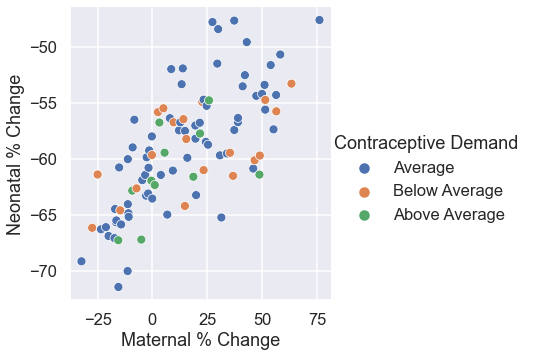

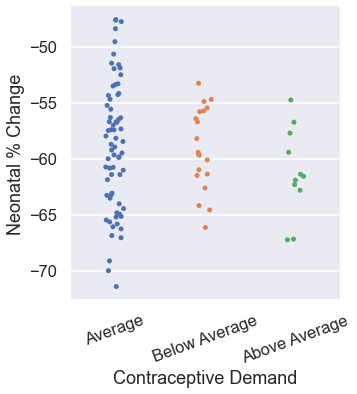

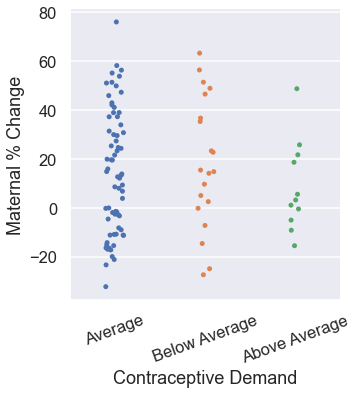

In [5]:
neonatal_vs_maternal_2 = sns.relplot(data=county_data, x="Maternal % Change", y="Neonatal % Change", hue="Contraceptive Demand")

neonatal_vs_demand = sns.catplot(data=county_data, x="Contraceptive Demand", y="Neonatal % Change")
plt.xticks(rotation = 20)

maternal_vs_demand = sns.catplot(data=county_data, x="Contraceptive Demand", y="Maternal % Change")
plt.xticks(rotation = 20)


In [6]:
# Lunch Stuff

In [7]:
lunch = pd.read_csv("data/ELSI.csv", header=3)
lunch = lunch.infer_objects()
lunches = lunch.drop(columns=["Total Number of Public Schools [Public School] 2017-18",
                              "Total Number of Public Schools [Public School] 2016-17",
                              "Total Number of Public Schools [Public School] 2015-16",
                              "Total Number of Public Schools [Public School] 2014-15",
                              "Free Lunch Eligible [Public School] 2017-18",
                              "Free Lunch Eligible [Public School] 2016-17",
                              "Free Lunch Eligible [Public School] 2015-16",
                              "Free Lunch Eligible [Public School] 2014-15",
                              "Reduced-price Lunch Eligible Students [Public School] 2017-18",
                              "Reduced-price Lunch Eligible Students [Public School] 2016-17",
                              "Reduced-price Lunch Eligible Students [Public School] 2015-16",
                              "Reduced-price Lunch Eligible Students [Public School] 2014-15",
                              "American Indian/Alaska Native Students [Public School] 2017-18",
                              "American Indian/Alaska Native Students [Public School] 2016-17",
                              "American Indian/Alaska Native Students [Public School] 2015-16",
                              "American Indian/Alaska Native Students [Public School] 2014-15",
                              "Asian or Asian/Pacific Islander Students [Public School] 2017-18",
                              "Asian or Asian/Pacific Islander Students [Public School] 2016-17",
                              "Asian or Asian/Pacific Islander Students [Public School] 2015-16",
                              "Asian or Asian/Pacific Islander Students [Public School] 2014-15",
                              "Hispanic Students [Public School] 2017-18",
                              "Hispanic Students [Public School] 2016-17",
                              "Hispanic Students [Public School] 2015-16",
                              "Hispanic Students [Public School] 2014-15",
                              "Black Students [Public School] 2017-18",
                              "Black Students [Public School] 2016-17",
                              "Black Students [Public School] 2015-16",
                              "Black Students [Public School] 2014-15",
                              "White Students [Public School] 2017-18",
                              "White Students [Public School] 2016-17",
                              "White Students [Public School] 2015-16",
                              "White Students [Public School] 2014-15",
                              "Hawaiian Nat./Pacific Isl. Students [Public School] 2017-18",
                              "Hawaiian Nat./Pacific Isl. Students [Public School] 2016-17",
                              "Hawaiian Nat./Pacific Isl. Students [Public School] 2015-16",
                              "Hawaiian Nat./Pacific Isl. Students [Public School] 2014-15",
                              "Two or More Races Students [Public School] 2017-18",
                              "Two or More Races Students [Public School] 2016-17",
                              "Two or More Races Students [Public School] 2015-16",
                              "Two or More Races Students [Public School] 2014-15",
                              "Total Race/Ethnicity [Public School] 2017-18",
                              "Total Race/Ethnicity [Public School] 2016-17",
                              "Total Race/Ethnicity [Public School] 2015-16",
                              "Total Race/Ethnicity [Public School] 2014-15",
                              "County Name"
                             ])
lunches = lunches.dropna()

In [8]:
lunch_data = county_data.merge(lunches, how = 'inner', left_on = 'GEOID20', right_on = "County Number [Public School] 2018-19")
lunch_data
lunch_data.loc[(lunch_data["Reduced-price Lunch Eligible Students [Public School] 2018-19"] == '="0"'), 'Reduced-price Lunch Eligible Students [Public School] 2018-19'] = '0'
lunch_data["Reduced-price Lunch Eligible Students [Public School] 2018-19"] = pd.to_numeric(lunch_data["Reduced-price Lunch Eligible Students [Public School] 2018-19"])
lunch_data["% on FRL"] = (lunch_data["Free Lunch Eligible [Public School] 2018-19"] + lunch_data["Reduced-price Lunch Eligible Students [Public School] 2018-19"]) / lunch_data["Total Race/Ethnicity [Public School] 2018-19"]

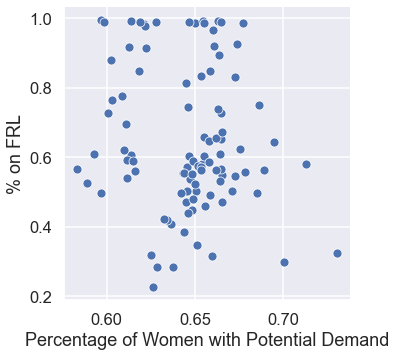

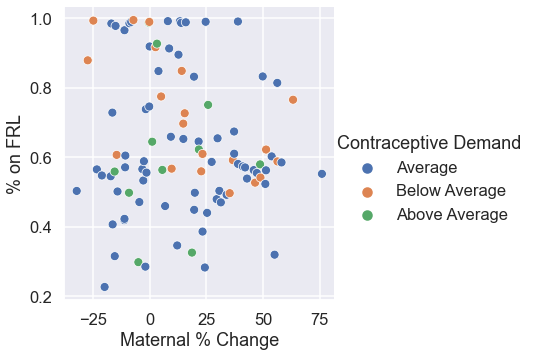

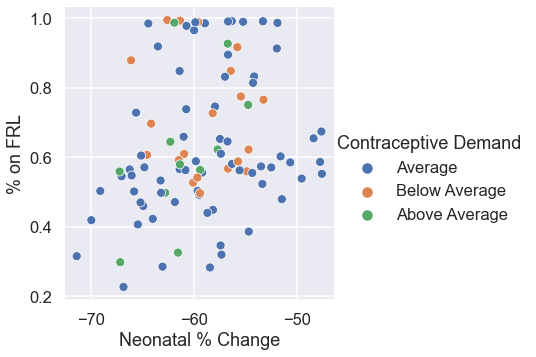

In [9]:
demand_vs_FRL = sns.relplot(data = lunch_data, x = "Percentage of Women with Potential Demand", y = "% on FRL")
FRL_vs_maternal = sns.relplot(data = lunch_data, x = "Maternal % Change", y = "% on FRL", hue="Contraceptive Demand")
FRL_vs_neonatal = sns.relplot(data = lunch_data, x = "Neonatal % Change", y = "% on FRL", hue="Contraceptive Demand")

